In [11]:
from IPython.display import Image
Image(url="https://dezyre.gumlet.io/images/blog/churn-models/Customer_Churn_Prediction_Models_in_Machine_Learning.png?w=1100&dpr=1.0", height=250)

# Business Problem:
# The problem is to predict which customers are likely to leave the bank's credit card services (churn) based on their characteristics, so the bank can proactively offer them better services and retain them.

In [12]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic starter data search:
# import pd
# head, info, describe, isna


In [13]:
df = pd.read_csv('BankChurners.csv')

In [14]:
df.head(25)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer            56      M                1   
13  816082233  Existing Customer            35      M                3   
14  712396908  Existing Customer            57      F                2   
15  714885258  Existing Customer            44      M                4   
16  709967358  Existing Customer            48      M                4   
17  753327333  Existing Customer            41      M                3   
18  806160108  Existing Customer            61      M                1   
19  709327383  Existing Customer            45      F                2   
20  806165208  Existing Customer            47      M                1   
21  708508758  Attrited Customer            62      F                0   
22  784725333  Existing Customer            41      M                3   
23  811604133  Existing Customer            47      F                4   
24  789124683  Existing Customer            54      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6          Unknown        Married         $120K +          Gold   
7      High School        Unknown     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Unknown         $120K +          Blue   
11         Unknown        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Unknown     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   
15         Unknown        Unknown    $80K - $120K          Blue   
16   Post-Graduate         Single    $80K - $120K          Blue   
17         Unknown        Married    $80K - $120K          Blue   
18     High School        Married     $40K - $60K          Blue   
19        Graduate        Married         Unknown          Blue   
20       Doctorate       Divorced     $60K - $80K          Blue   
21        Graduate        Married  Less than $40K          Blue   
22     High School        Married     $40K - $60K          Blue   
23         Unknown         Single  Less than $40K          Blue   
24         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  

# Identified some potential columns that are 'string' which could be useful features if numerical: 
# Gender, Income_Category, Attrition_Flag

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [16]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [17]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Begin with simple comparative EDA 


/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Attrition_Flag', ylabel='count'>

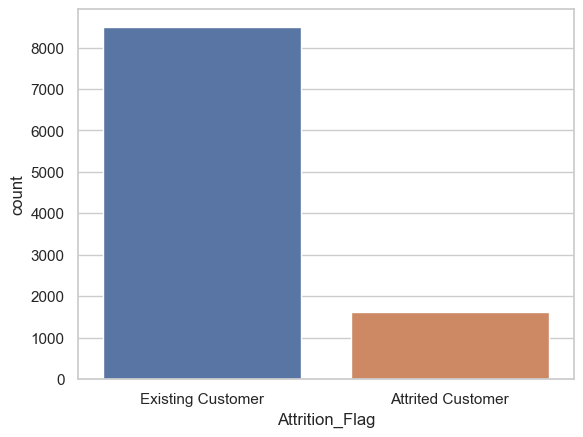

In [135]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='Attrition_Flag')

# Dataset is heavily imbalanced which will potentially lean models towards Attrited Customer. 

# Models will need to be able to handle imbalanced (such as Logistic Regression)

In [19]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

# Violin plot shows that attrited customers with slightly higher credit limit than existing.

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

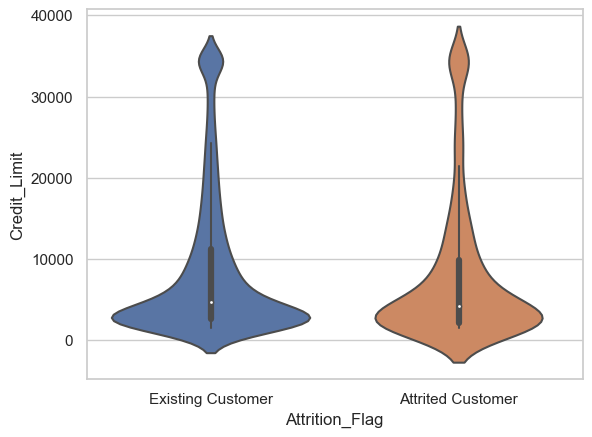

In [136]:
sns.set(style="whitegrid")
sns.violinplot(data=df, x='Attrition_Flag', y='Credit_Limit')

## Customers with higher amount of transactions on their cards are "existing"

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

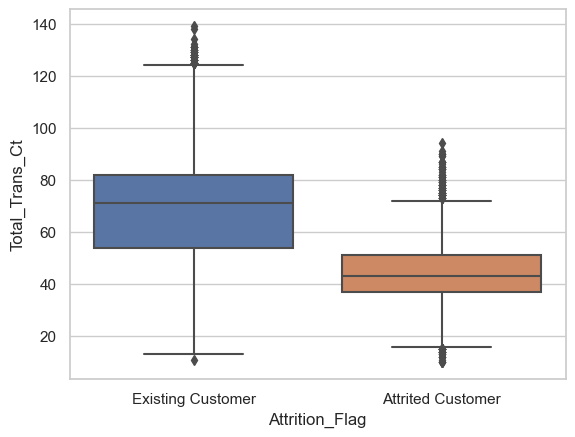

In [134]:
sns.set(style="whitegrid")
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Ct')

# Highest total amounts of 'Months On Books' are the Blue and Platinum card category. 
# Analysis can be teaching that the starter cards are a great pull for customers looking to build credit.
# And the platinum is the other best alternative most likely due to higher credit limits and better incentives.

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Months_on_book', ylabel='Card_Category'>

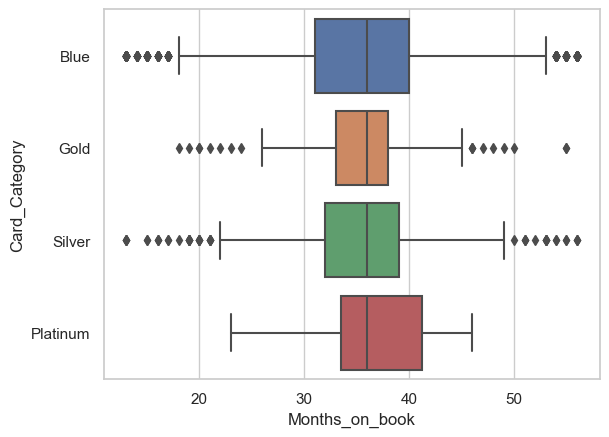

In [133]:
sns.set(style="whitegrid")
sns.boxplot(data=df,y='Card_Category', x='Months_on_book')


# Use get_dummies for Income_Category', 'Education_Level', 'Marital_Status  to be numerical values as this can be important features.  



In [24]:
# Use get_dummies to convert categorical columns to numeric
df = pd.get_dummies(df, columns=['Income_Category', 'Education_Level', 'Marital_Status'], drop_first=True)




In [25]:
df.head(15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer            56      M                1   
13  816082233  Existing Customer            35      M                3   
14  712396908  Existing Customer            57      F                2   

   Card_Category  Months_on_book  Total_Relationship_Count  \
0           Blue              39                         5   
1           Blue              44                         6   
2           Blue              36                         4   
3           Blue              34                         3   
4           Blue              21                         5   
5           Blue              36                         3   
6           Gold              46                         6   
7         Silver              27                         2   
8           Blue              36                         5   
9           Blue              36                         6   
10          Blue              31                         5   
11          Blue              54                         6   
12          Blue              36                         3   
13          Blue              30                         5   
14          Blue              48                         5   

    Months_Inactive_12_mon  Contacts_Count_12_mon  ...  \
0                        1                      3  ...   
1                        1                      2  ...   
2                        1                      0  ...   
3                        4                      1  ...   
4                        1                      0  ...   
5                        1                      2  ...   
6                        1                      3  ...   
7                        2                      2  ...   
8                        2                      0  ...   
9                        3                      3  ...   
10                       3                      2  ...   
11                       2                      3  ...   
12                       6                      0  ...   
13                       1                      3  ...   
14                       2                      2  ...   

    Income_Category_Unknown  Education_Level_Doctorate  \
0                     False                      False   
1                     False                      False   
2                     False                      False   
3                     False                      False   
4                     False                      False   
5                     False                      False   
6                     False                      False   
7                     False                      False   
8                     False                      False   
9                     False                      False   
10                    False                      False   
11                    False                      False   
12                    False                      False   
13                    False                      False   
14                    False

In [26]:
# Convert boolean columns to integers (1 and 0)
df[['Income_Category_Unknown', 'Education_Level_Doctorate', 'Education_Level_Graduate',
    'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
    'Education_Level_Unknown', 'Marital_Status_Married', 'Marital_Status_Single',
    'Marital_Status_Unknown']] = df[['Income_Category_Unknown', 'Education_Level_Doctorate',
                                     'Education_Level_Graduate', 'Education_Level_High School',
                                     'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
                                     'Education_Level_Unknown', 'Marital_Status_Married',
                                     'Marital_Status_Single', 'Marital_Status_Unknown']].astype(int)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [28]:
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Card_Category  Months_on_book  Total_Relationship_Count  \
0          Blue              39                         5   
1          Blue              44                         6   
2          Blue              36                         4   
3          Blue              34                         3   
4          Blue              21                         5   
5          Blue              36                         3   
6          Gold              46                         6   
7        Silver              27                         2   
8          Blue              36                         5   
9          Blue              36                         6   

   Months_Inactive_12_mon  Contacts_Count_12_mon  ...  \
0                       1                      3  ...   
1                       1                      2  ...   
2                       1                      0  ...   
3                       4                      1  ...   
4                       1                      0  ...   
5                       1                      2  ...   
6                       1                      3  ...   
7                       2                      2  ...   
8                       2                      0  ...   
9                       3                      3  ...   

   Income_Category_Unknown  Education_Level_Doctorate  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   
7                        0                          0   
8                        0                          0   
9                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   
5                         1                            0   
6                         0                            0   
7                         0                            1   
8                         0                            0   
9                         1                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   
5                              0                           0   
6                              0                           0   
7                              0                           0   
8                              0  

# Add Gender_Code to be Gender numerical value as this can be an important feature.
## Male: 1
## Female: 2

In [29]:
# Create a new column 'Gender_Code' based on 'Gender'
df['Gender_Code'] = df['Gender'].map({'M': 1, 'F': 2})

# Display the updated DataFrame
print(df[['Gender', 'Gender_Code']].head())

  Gender  Gender_Code
0      M            1
1      F            2
2      M            1
3      F            2
4      M            1


## Drop Useless Columns and "ClientNum"

In [30]:
# Drop the specified column
df = df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis=1)


In [31]:
df = df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", axis=1)

In [32]:
df = df.drop("CLIENTNUM", axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  object 
 1   Customer_Age                    10127 non-null  int64  
 2   Gender                          10127 non-null  object 
 3   Dependent_count                 10127 non-null  int64  
 4   Card_Category                   10127 non-null  object 
 5   Months_on_book                  10127 non-null  int64  
 6   Total_Relationship_Count        10127 non-null  int64  
 7   Months_Inactive_12_mon          10127 non-null  int64  
 8   Contacts_Count_12_mon           10127 non-null  int64  
 9   Credit_Limit                    10127 non-null  float64
 10  Total_Revolving_Bal             10127 non-null  int64  
 11  Avg_Open_To_Buy                 10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1            

# Review Current columns

In [34]:
df.head(5)

Attrition_Flag  Customer_Age Gender  Dependent_count Card_Category  \
0  Existing Customer            45      M                3          Blue   
1  Existing Customer            49      F                5          Blue   
2  Existing Customer            51      M                3          Blue   
3  Existing Customer            40      F                4          Blue   
4  Existing Customer            40      M                3          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  ...  Education_Level_Doctorate  \
0                      3       12691.0  ...                          0   
1                      2        8256.0  ...                          0   
2                      0        3418.0  ...                          0   
3                      1        3313.0  ...                          0   
4                      0        4716.0  ...                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Unknown  Gender_Code  
0                       0            1  
1                       0            2  
2                       0            1  
3                       1            2  
4                       0            1  

[5 rows x 32 columns]

# Add Attrited Customer column to have a numerical value represented to use as a potential Target value. 
## Attrited Customer: 1
## Existing Customer: 0

In [35]:
# Create the 'Existing_Customer' column
df['Attrition_Customer'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)


## Check Columns 

In [36]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Card_Category  \
0  Existing Customer            45      M                3          Blue   
1  Existing Customer            49      F                5          Blue   
2  Existing Customer            51      M                3          Blue   
3  Existing Customer            40      F                4          Blue   
4  Existing Customer            40      M                3          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  ...  Education_Level_Graduate  \
0                      3       12691.0  ...                         0   
1                      2        8256.0  ...                         1   
2                      0        3418.0  ...                         1   
3                      1        3313.0  ...                         0   
4                      0        4716.0  ...                         0   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            1                              0   
1                            0                              0   
2                            0                              0   
3                            1                              0   
4                            0                              0   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           1                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                       1                      0                       0   
1                       0                      1                       0   
2                       1                      0                       0   
3                       0                      0                       1   
4                       1                      0                       0   

   Gender_Code  Attrition_Customer  
0            1                   0  
1            2                   0  
2            1                   0  
3            2                   0  
4            1                   0  

[5 rows x 33 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  object 
 1   Customer_Age                    10127 non-null  int64  
 2   Gender                          10127 non-null  object 
 3   Dependent_count                 10127 non-null  int64  
 4   Card_Category                   10127 non-null  object 
 5   Months_on_book                  10127 non-null  int64  
 6   Total_Relationship_Count        10127 non-null  int64  
 7   Months_Inactive_12_mon          10127 non-null  int64  
 8   Contacts_Count_12_mon           10127 non-null  int64  
 9   Credit_Limit                    10127 non-null  float64
 10  Total_Revolving_Bal             10127 non-null  int64  
 11  Avg_Open_To_Buy                 10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1            

# Use VarianceThreshold to select high variance features

In [38]:
from sklearn.feature_selection import VarianceThreshold

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Creating a DataFrame with only numerical columns
X_numeric = df[numerical_columns]

# Using VarianceThreshold
variance_threshold = 0.1  # You can adjust this threshold based on your preference
selector = VarianceThreshold(threshold=variance_threshold)

# Fit and transform the data
X_high_variance = selector.fit_transform(X_numeric)

# Get the selected features
selected_features = X_numeric.columns[selector.get_support()]

# Display the selected features
print("Selected Features:", selected_features)






Selected Features: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single', 'Gender_Code',
       'Attrition_Customer'],
      dtype='object')


# Display heat map to show any correlations to Attrition Customers.

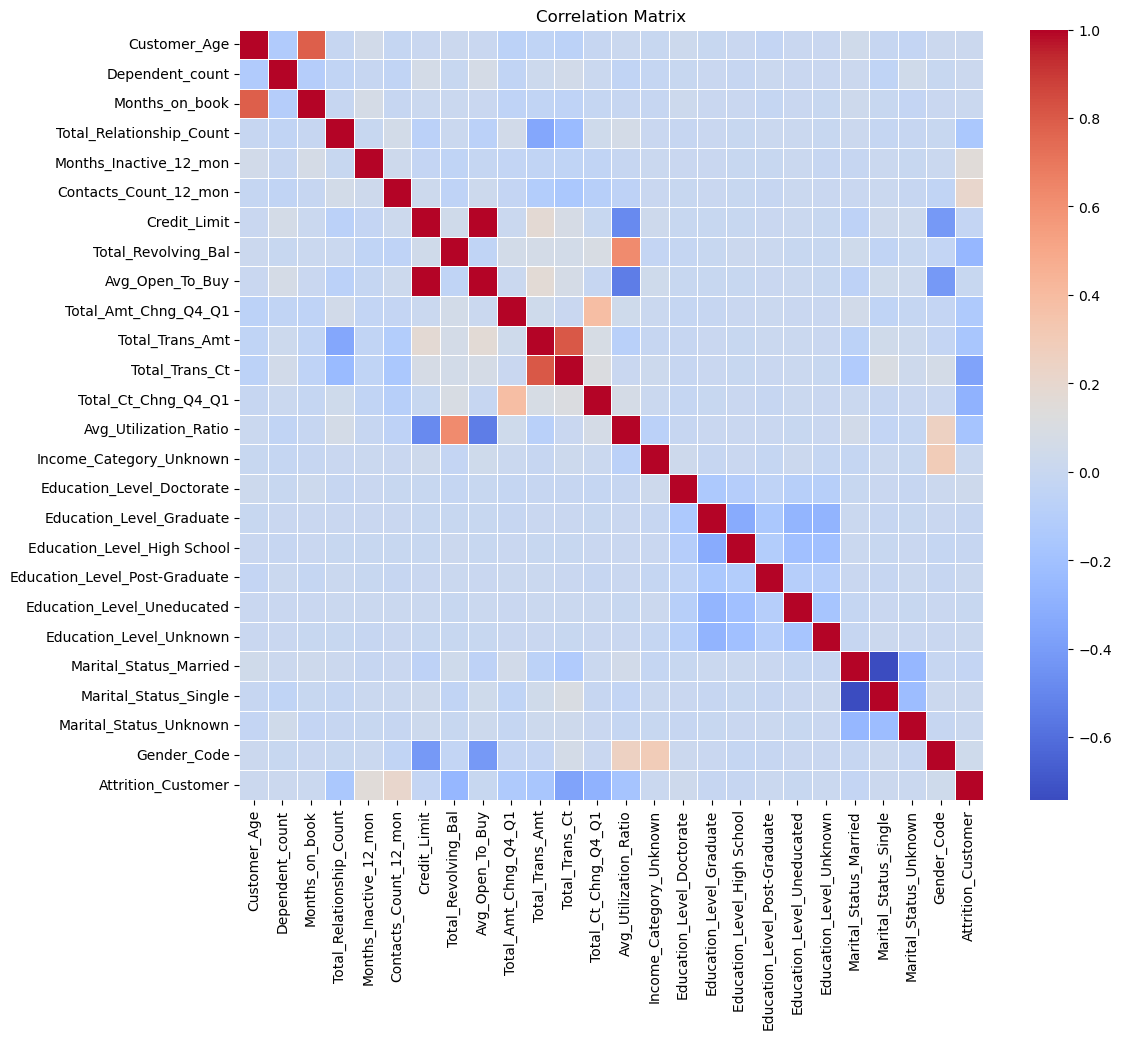

In [39]:
# Assuming df is your DataFrame
# If you have non-numeric columns, you might want to encode or drop them before creating the correlation matrix

# For example, drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

# Highest correlation value for Attrition customers is 'Contacts_Count_12_mon'
## With this correlation its possible that these were unhappy customers making calls to the bank. 
## This category is followed most closely in correlation to 'Months_Inactive_12_mon'

In [140]:
df_numeric.corr()['Attrition_Customer'].sort_values()

Total_Trans_Ct                  -0.371403
Total_Ct_Chng_Q4_Q1             -0.290054
Total_Revolving_Bal             -0.263053
Avg_Utilization_Ratio           -0.178410
Total_Trans_Amt                 -0.168598
Total_Relationship_Count        -0.150005
Total_Amt_Chng_Q4_Q1            -0.131063
Credit_Limit                    -0.023873
Marital_Status_Married          -0.023735
Education_Level_High School     -0.011730
Education_Level_Graduate        -0.009046
Education_Level_Uneducated      -0.001444
Avg_Open_To_Buy                 -0.000285
Income_Category_Unknown          0.007179
Marital_Status_Unknown           0.008904
Education_Level_Unknown          0.009005
Education_Level_Post-Graduate    0.011127
Months_on_book                   0.013687
Customer_Age                     0.018203
Dependent_count                  0.018991
Marital_Status_Single            0.019037
Education_Level_Doctorate        0.029386
Gender_Code                      0.037272
Months_Inactive_12_mon           0

# Potential Features to be used and trained on models based on .corr 

# Contacts_Count_12_mon, Months_Inactive_12_mon, Gender_Code, Marital_Status_Single, Dependent_count, Customer_Age

# Count of people and the 12 month count of how long their cards were inactive.

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

<Figure size 1000x600 with 0 Axes>

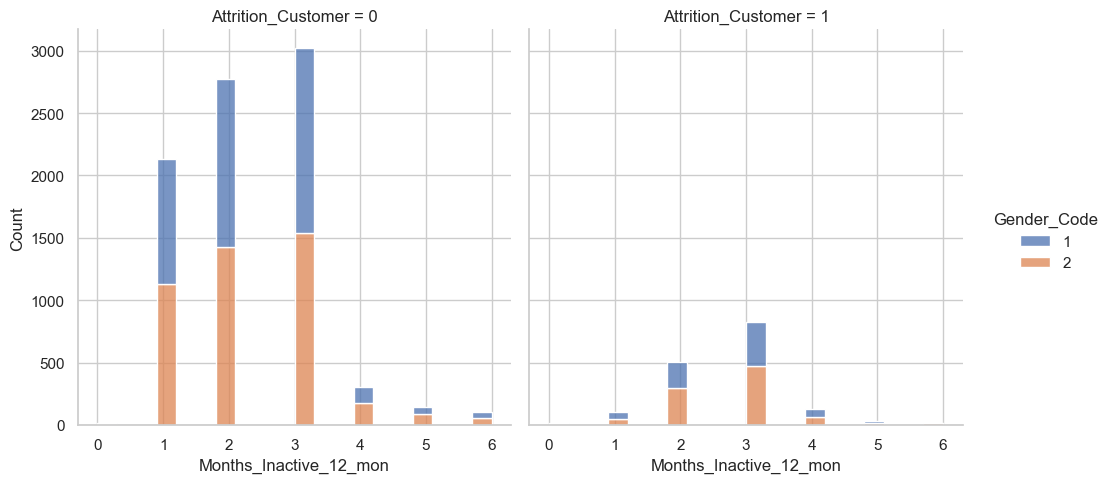

In [141]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.displot(df, x='Months_Inactive_12_mon', hue='Gender_Code', col='Attrition_Customer', multiple='stack', bins=20)
plt.show()


# Check correlation of 'Contact_Count_12_mon'

In [142]:
df_numeric.corr()['Contacts_Count_12_mon'].sort_values()

Total_Trans_Ct                  -0.152213
Total_Trans_Amt                 -0.112774
Total_Ct_Chng_Q4_Q1             -0.094997
Avg_Utilization_Ratio           -0.055471
Total_Revolving_Bal             -0.053913
Dependent_count                 -0.040505
Gender_Code                     -0.039987
Total_Amt_Chng_Q4_Q1            -0.024445
Customer_Age                    -0.018452
Months_on_book                  -0.010774
Marital_Status_Unknown          -0.009562
Education_Level_Post-Graduate   -0.006878
Education_Level_High School     -0.003927
Education_Level_Doctorate       -0.001016
Education_Level_Unknown          0.000843
Marital_Status_Married           0.001598
Income_Category_Unknown          0.002195
Education_Level_Graduate         0.002660
Marital_Status_Single            0.007997
Education_Level_Uneducated       0.012596
Credit_Limit                     0.020817
Avg_Open_To_Buy                  0.025646
Months_Inactive_12_mon           0.029493
Total_Relationship_Count         0

# Count of people and the 12 month count of times they contacted their banks.
## With this visual it should be recommended to the bank to flag amount of time that a negative call is made and this can be a determining factor to predict customer attrition.

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

<Figure size 2000x1200 with 0 Axes>

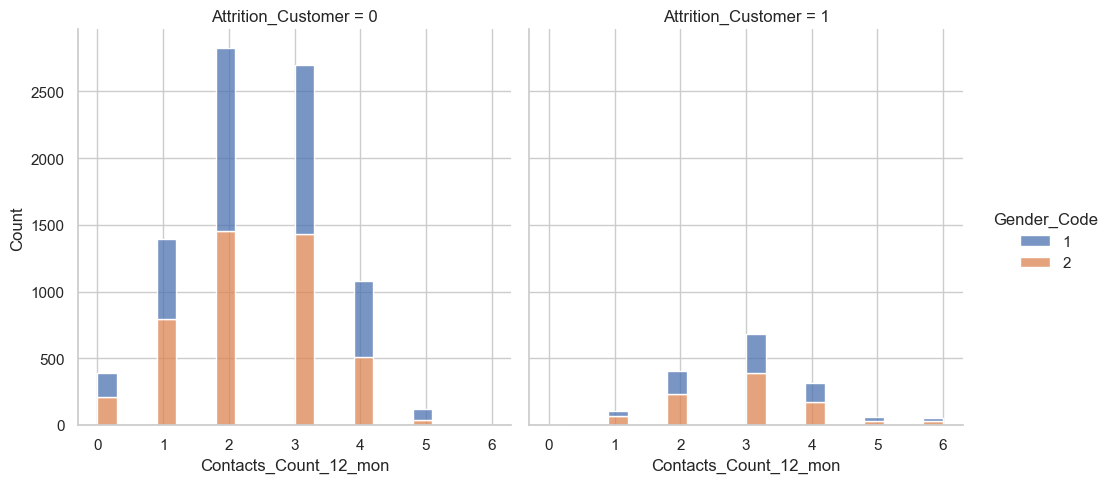

In [195]:
plt.figure(figsize=(10, 6),dpi=200)
sns.set(style="whitegrid")
sns.displot(df, x='Contacts_Count_12_mon', hue='Gender_Code', col='Attrition_Customer', multiple='stack', bins=20)
plt.show()

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Attrition_Flag                  10127 non-null  object  
 1   Customer_Age                    10127 non-null  int64   
 2   Gender                          10127 non-null  object  
 3   Dependent_count                 10127 non-null  int64   
 4   Card_Category                   10127 non-null  object  
 5   Months_on_book                  10127 non-null  int64   
 6   Total_Relationship_Count        10127 non-null  int64   
 7   Months_Inactive_12_mon          10127 non-null  int64   
 8   Contacts_Count_12_mon           10127 non-null  int64   
 9   Credit_Limit                    10127 non-null  float64 
 10  Total_Revolving_Bal             10127 non-null  int64   
 11  Avg_Open_To_Buy                 10127 non-null  float64 
 12  Total_Amt_Chng_Q4_

# Check to see if there was any trend on spend between male and female 
# Data showed higher utilization from Woman and higher credit limits from Men. 

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Credit_Limit', ylabel='Avg_Utilization_Ratio'>

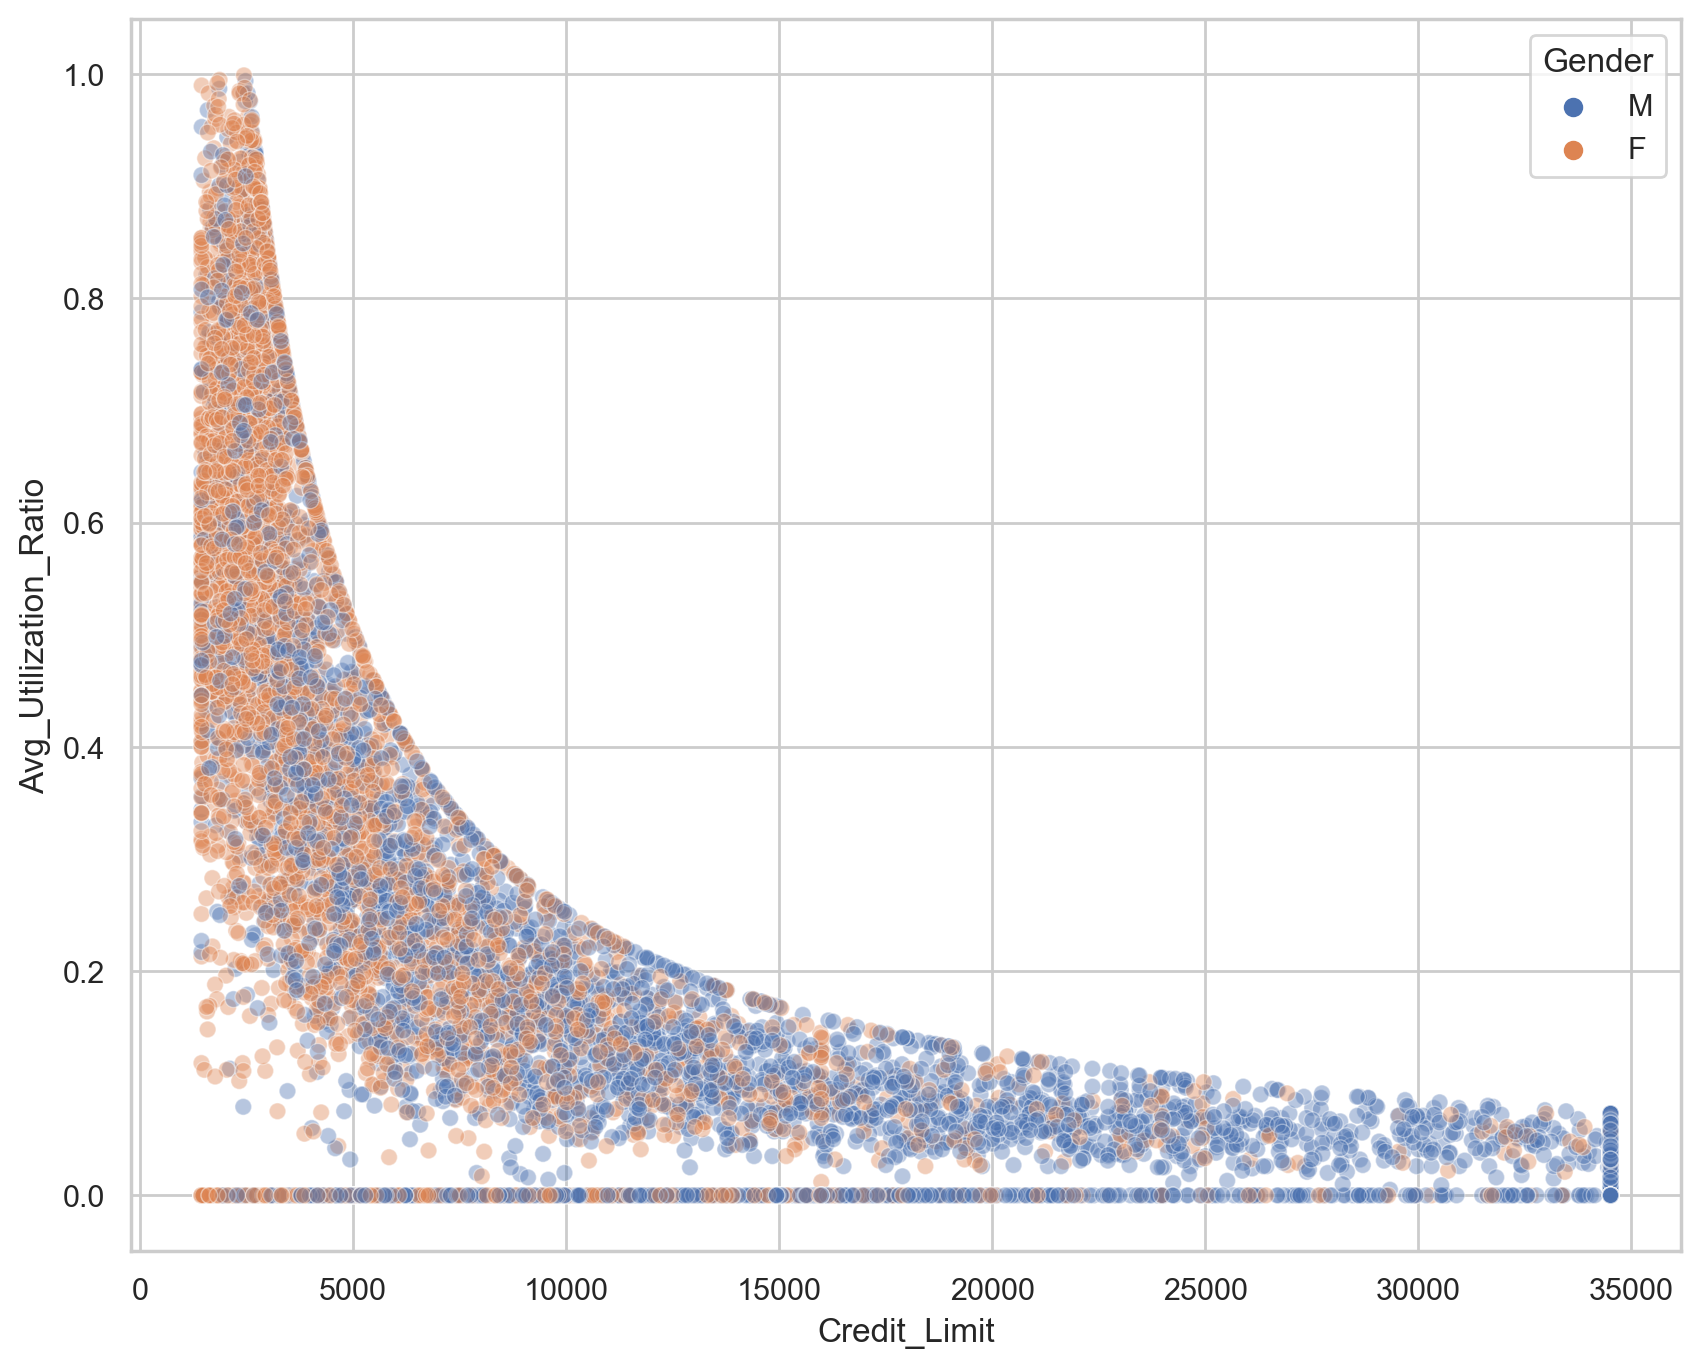

In [145]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Gender', alpha=0.4)


In [137]:
df.head(15)

Attrition_Flag  Customer_Age Gender  Dependent_count Card_Category  \
0   Existing Customer            45      M                3          Blue   
1   Existing Customer            49      F                5          Blue   
2   Existing Customer            51      M                3          Blue   
3   Existing Customer            40      F                4          Blue   
4   Existing Customer            40      M                3          Blue   
5   Existing Customer            44      M                2          Blue   
6   Existing Customer            51      M                4          Gold   
7   Existing Customer            32      M                0        Silver   
8   Existing Customer            37      M                3          Blue   
9   Existing Customer            48      M                2          Blue   
10  Existing Customer            42      M                5          Blue   
11  Existing Customer            65      M                1          Blue   
12  Existing Customer            56      M                1          Blue   
13  Existing Customer            35      M                3          Blue   
14  Existing Customer            57      F                2          Blue   

    Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0               39                         5                       1   
1               44                         6                       1   
2               36                         4                       1   
3               34                         3                       4   
4               21                         5                       1   
5               36                         3                       1   
6               46                         6                       1   
7               27                         2                       2   
8               36                         5                       2   
9               36                         6                       3   
10              31                         5                       3   
11              54                         6                       2   
12              36                         3                       6   
13              30                         5                       1   
14              48                         5                       2   

    Contacts_Count_12_mon  Credit_Limit  ...  Education_Level_Graduate  \
0                       3       12691.0  ...                         0   
1                       2        8256.0  ...                         1   
2                       0        3418.0  ...                         1   
3                       1        3313.0  ...                         0   
4                       0        4716.0  ...                         0   
5                       2        4010.0  ...                         1   
6                       3       34516.0  ...                         0   
7                       2       29081.0  ...                         0   
8                       0       22352.0  ...                         0   
9                       3       11656.0  ...                         1   
10                      2        6748.0  ...                         0   
11                      3        9095.0  ...                         0   
12                      0       11751.0  ...                         0   
13                      3        8547.0  ...                         1   
14                      2        2436.0  ...                         1   

    Education_Level_High School  Education_Level_Post-Graduate  \
0                             1                              0   
1                             0                              0   
2                             0                              0   
3                             1                              0   
4                             0                              0   
5                             0         

# Higher total count of attrition and existing from woman customers 

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

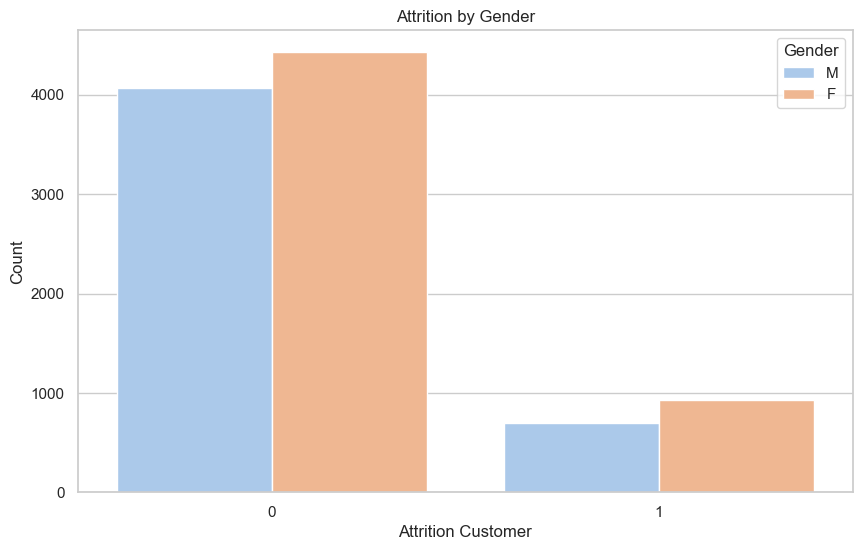

In [138]:
# Create a stacked bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition_Customer', hue='Gender', palette='pastel')
plt.title('Attrition by Gender')
plt.xlabel('Attrition Customer')
plt.ylabel('Count')
plt.show()

# Men and Women are both maintain higher balances but woman have a higher presence in Avg Utilization

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Total_Revolving_Bal'>

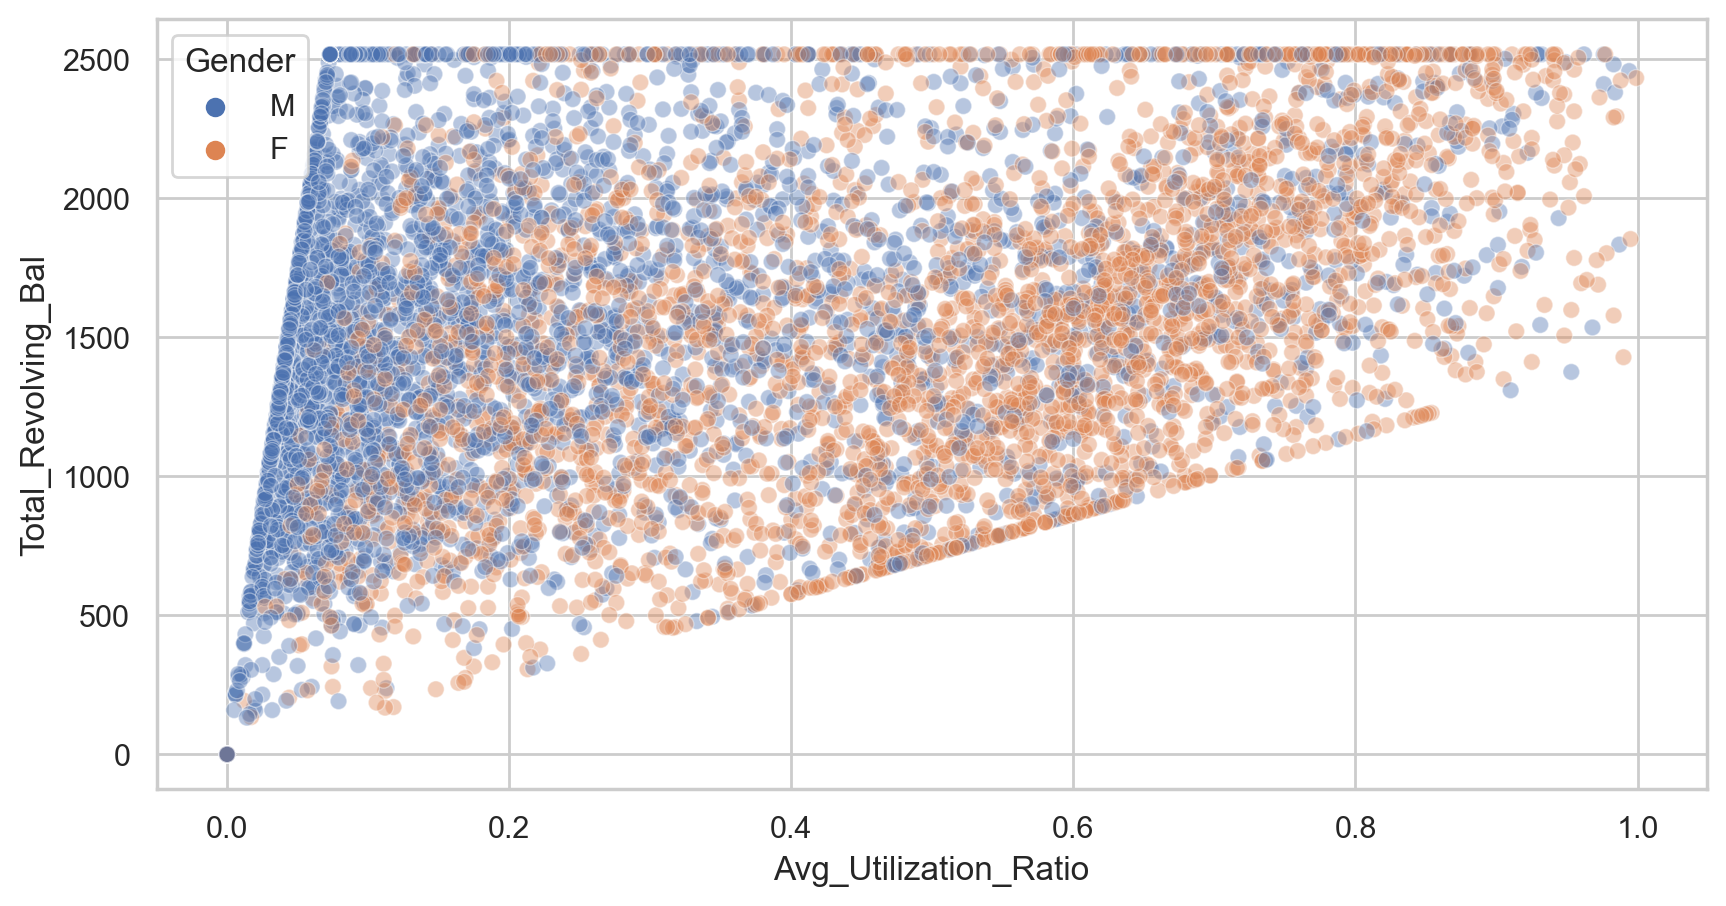

In [112]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df, x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Gender',
               alpha=0.4)

# High concentration pocket of attrition from customers with low Total Revolving Balances under $500
# This shows there's a higher chance of a customer staying with their credit card if they spend more money on it. 

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Total_Revolving_Bal'>

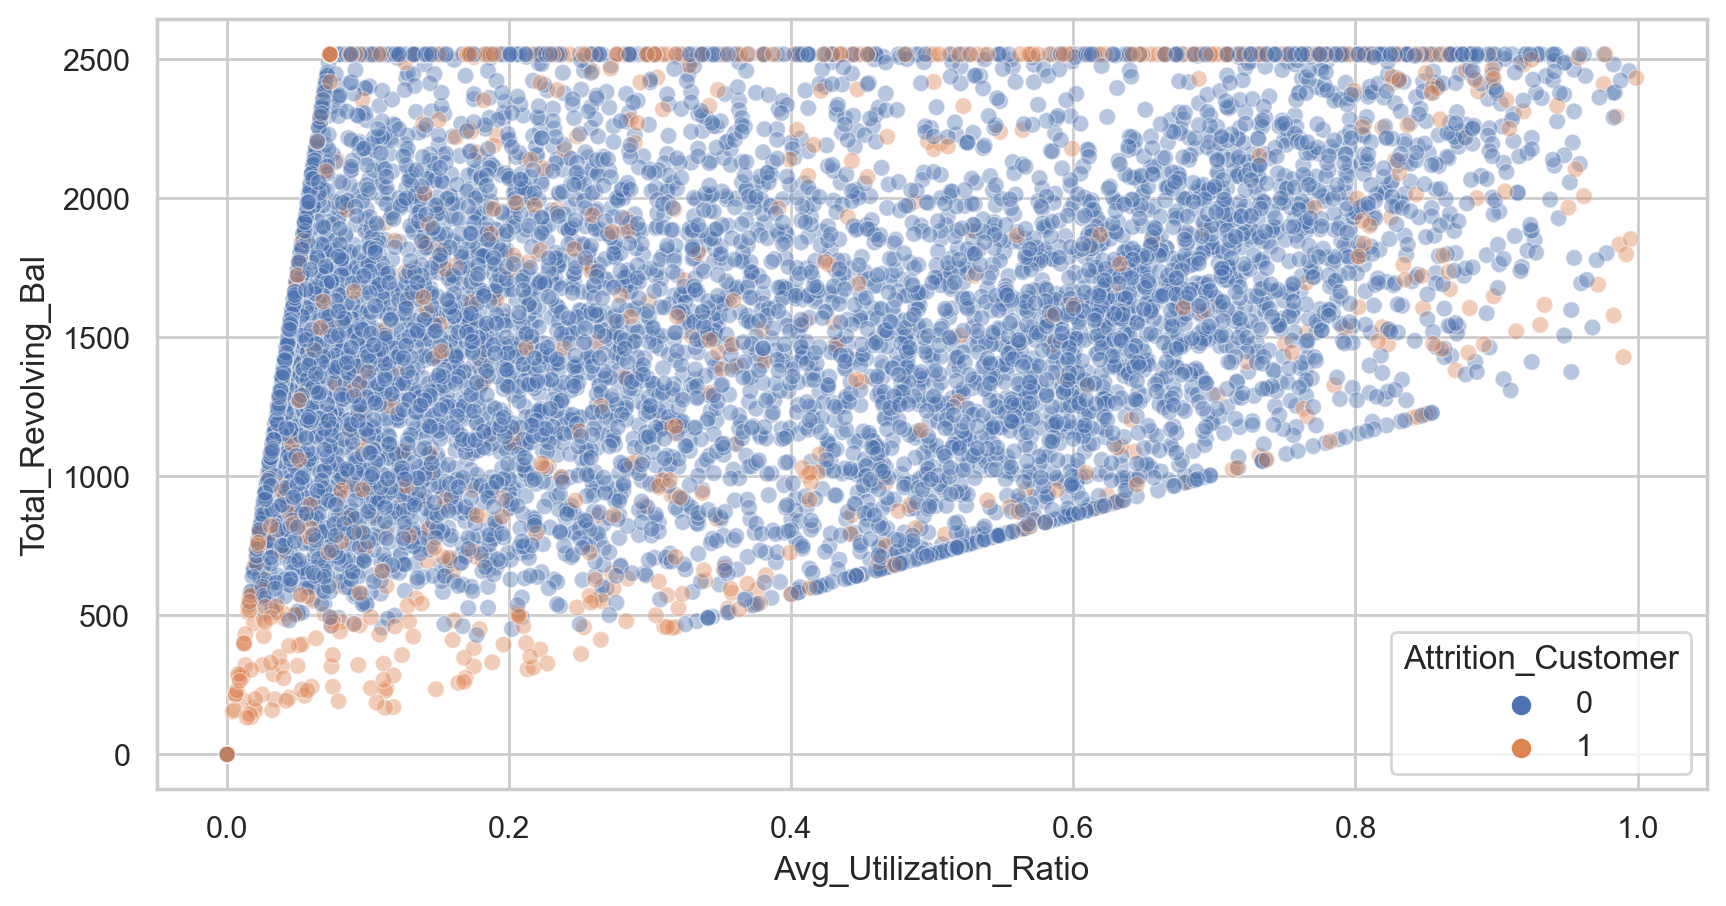

In [127]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df, x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Customer',
               alpha=0.4)

# Final check for trends between existing and attrited with KDE
# High amount of people canceling around the 36 month mark. Potentially due to beneficial terms ending around that time or the system cancels cards after 3 years of high inactivity

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

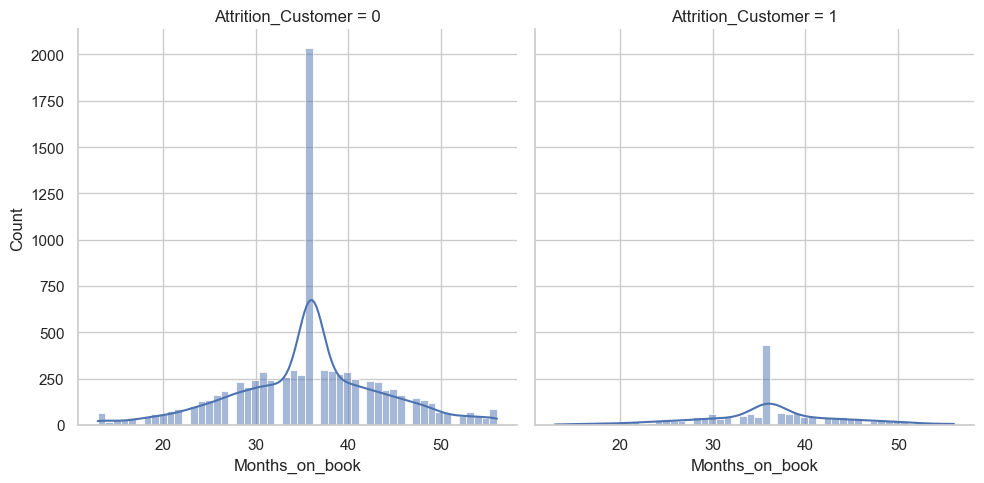

In [39]:
# Set the style
sns.set(style="whitegrid")

# Create a distribution plot for 'Months_on_book' with separate columns for 'Existing_Customer'
sns.displot(df, x='Months_on_book', col='Attrition_Customer', kde=True)
plt.show()

In [156]:
df.head(30)

Attrition_Flag  Customer_Age Gender  Dependent_count Card_Category  \
0   Existing Customer            45      M                3          Blue   
1   Existing Customer            49      F                5          Blue   
2   Existing Customer            51      M                3          Blue   
3   Existing Customer            40      F                4          Blue   
4   Existing Customer            40      M                3          Blue   
5   Existing Customer            44      M                2          Blue   
6   Existing Customer            51      M                4          Gold   
7   Existing Customer            32      M                0        Silver   
8   Existing Customer            37      M                3          Blue   
9   Existing Customer            48      M                2          Blue   
10  Existing Customer            42      M                5          Blue   
11  Existing Customer            65      M                1          Blue   
12  Existing Customer            56      M                1          Blue   
13  Existing Customer            35      M                3          Blue   
14  Existing Customer            57      F                2          Blue   
15  Existing Customer            44      M                4          Blue   
16  Existing Customer            48      M                4          Blue   
17  Existing Customer            41      M                3          Blue   
18  Existing Customer            61      M                1          Blue   
19  Existing Customer            45      F                2          Blue   
20  Existing Customer            47      M                1          Blue   
21  Attrited Customer            62      F                0          Blue   
22  Existing Customer            41      M                3          Blue   
23  Existing Customer            47      F                4          Blue   
24  Existing Customer            54      M                2          Blue   
25  Existing Customer            41      F                3          Blue   
26  Existing Customer            59      M                1          Blue   
27  Existing Customer            63      M                1          Blue   
28  Existing Customer            44      F                3          Blue   
29  Existing Customer            47      M                4          Blue   

    Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0               39                         5                       1   
1               44                         6                       1   
2               36                         4                       1   
3               34                         3                       4   
4               21                         5                       1   
5               36                         3                       1   
6               46                         6                       1   
7               27                         2                       2   
8               36                         5                       2   
9               36                         6                       3   
10              31                         5                       3   
11              54                         6                       2   
12              36                         3                       6   
13              30                         5                       1   
14              48                         5                       2   
15              37                         5                       1   
16              36                         6                       2   
17              34                         4                       4   
18              56                         2                       2   
19              37                         6                       1   
20              42                         5                       2   
21              49                 

# Features to be used and trained on models based on EDA insights
# 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Gender_Code', 'Marital_Status_Single','Dependent_count', 'Customer_Age', 'Avg_Open_To_Buy','Credit_Limit', 'Avg_Utilization_Ratio','Total_Trans_Amt','Total_Trans_Ct'

In [180]:
df['Attrition_Customer'].isna().sum()


0

# Begin first simple model
# Logistic Regression

In [231]:
X = df[['Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Gender_Code', 'Marital_Status_Single',
        'Dependent_count', 'Customer_Age', 'Avg_Open_To_Buy','Credit_Limit', 'Avg_Utilization_Ratio',
        'Total_Trans_Amt','Total_Trans_Ct']]


In [232]:
y = df['Attrition_Customer']

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [235]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



In [237]:
logreg = LogisticRegression()


# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Predictions on the test set
y_pred = best_estimator.predict(X_test)



/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best Parameters: {'C': 1}


/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2549
           1       0.70      0.49      0.57       490

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.88      3039



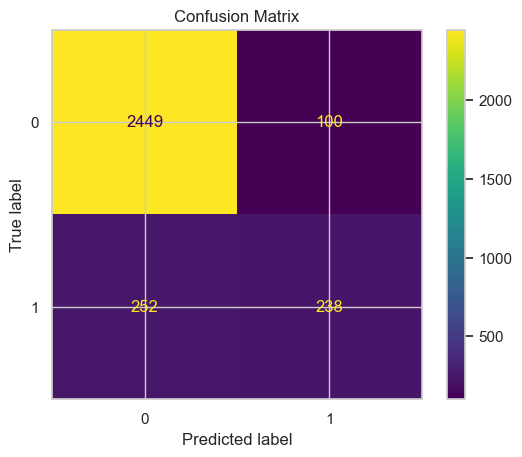

In [238]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_estimator.classes_).plot()
plt.title('Confusion Matrix')
plt.show()


# 2nd Model: 
# Single Decision Tree

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5,10,15,20],  # You can adjust these values based on your data
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=23)

# Create GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:  {'max_depth': 10}


In [241]:
dt = DecisionTreeClassifier(max_depth=10)

In [242]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [217]:
preds = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2549
           1       0.33      0.32      0.33       490

    accuracy                           0.78      3039
   macro avg       0.60      0.60      0.60      3039
weighted avg       0.78      0.78      0.78      3039



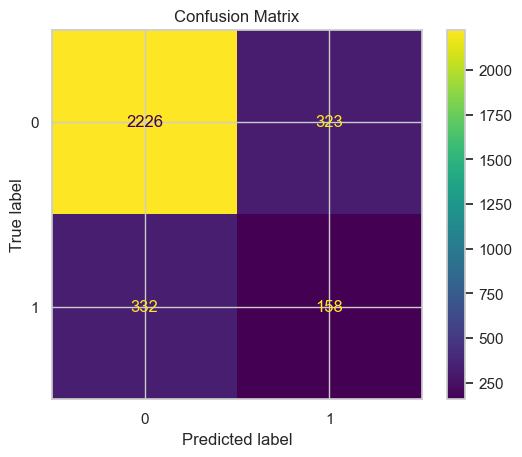

In [244]:
print(classification_report(y_test,preds))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_estimator.classes_).plot()
plt.title('Confusion Matrix')
plt.show()


In [245]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Feature Importance'] )

In [246]:
imp_feats

Feature Importance
Contacts_Count_12_mon             0.035266
Months_Inactive_12_mon            0.032542
Gender_Code                       0.011152
Marital_Status_Single             0.010614
Dependent_count                   0.014668
Customer_Age                      0.054179
Avg_Open_To_Buy                   0.042879
Credit_Limit                      0.019080
Avg_Utilization_Ratio             0.183463
Total_Trans_Amt                   0.246015
Total_Trans_Ct                    0.350140

/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Contacts_Count_12_mon'),
  Text(1, 0, 'Months_Inactive_12_mon'),
  Text(2, 0, 'Gender_Code'),
  Text(3, 0, 'Marital_Status_Single'),
  Text(4, 0, 'Dependent_count'),
  Text(5, 0, 'Customer_Age'),
  Text(6, 0, 'Avg_Open_To_Buy'),
  Text(7, 0, 'Credit_Limit'),
  Text(8, 0, 'Avg_Utilization_Ratio'),
  Text(9, 0, 'Total_Trans_Amt'),
  Text(10, 0, 'Total_Trans_Ct')])

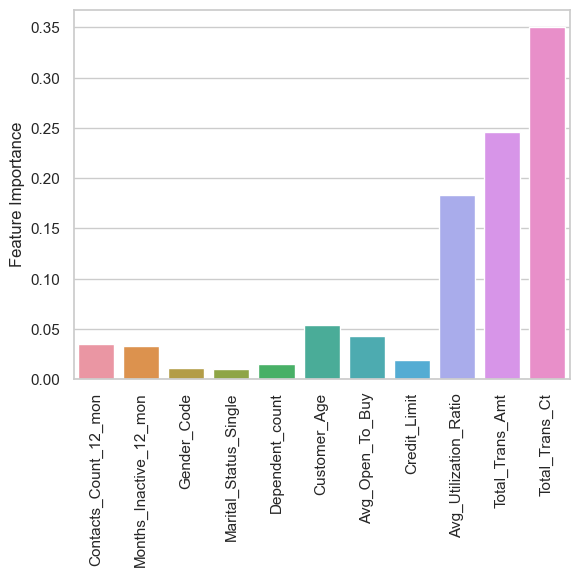

In [247]:
sns.barplot(data=imp_feats, x=imp_feats.index, y='Feature Importance')
plt.xticks(rotation=90)